# **Importing relevant packages**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox, zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (silhouette_score, auc, accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, precision_recall_curve, average_precision_score)

# **Tutoring Website Data**

In [39]:
file = r'C:\Users\durga\OneDrive\Desktop\hanuman\Tutoring Dataset.csv'
df = pd.read_csv(file)
df.head()

,User_ID,Age_in_Months,Gender,Location,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,...,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Tier,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,654b113d-4ce4-41a9-a8f4-7f1419419230,156,Other,"Smithchester, VA",8th Grade,6,5,9.784359,107.889381,Chemistry,...,3,7,1910.292936,Free,0.00,4,Yes,Yes,0,D
1,2a044973-1d29-4b2f-83f6-c488290140bb,202,Female,"Beckside, FL",10th Grade,6,6,9.000000,198.865171,Web Development,...,4,9,1698.767255,Free,0.00,1,Yes,No,0,F
2,d84bb18b-bd77-4be9-98bb-a0993b95af75,173,Other,"New Deborahborough, SD",9th Grade,7,4,12.159345,232.639784,Geometry,...,4,10,1860.295769,Premium,9.99,13,Yes,No,0,D
3,411cebf6-18cc-4846-89c7-f3f7bcaede01,199,Female,"West Stephanie, KY",12th Grade,17,17,28.000000,506.644691,Pre-Calculus,...,3,28,4465.824908,Basic,5.99,11,Yes,No,1,F
4,e4ada708-10b6-4fcd-ac08-a83152658751,148,Female,"West Roberthaven, LA",7th Grade,10,8,15.458939,305.275706,Java Programming,...,4,17,2499.211664,Premium,9.99,12,Yes,No,0,F


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        14843 non-null  object 
 1   Age_in_Months                  14843 non-null  int64  
 2   Gender                         14843 non-null  object 
 3   Location                       14843 non-null  object 
 4   Grade                          14843 non-null  object 
 5   Logins_per_Month               14843 non-null  int64  
 6   Days_Completed_Activity        14843 non-null  int64  
 7   Exercises_Started              14843 non-null  float64
 8   Total_Time_Spent_in_Minutes    14843 non-null  float64
 9   Course_Name                    14843 non-null  object 
 10  Course_Category                14843 non-null  object 
 11  Completion_Rate                14843 non-null  float64
 12  Average_Score                  14843 non-null 

# **Removing Freemium Users**

In [42]:
df = df[df['Subscription_Tier'] != 'Free']

# **Removing Redundant Features**

In [43]:
df  = df.drop(['User_ID','Location','Subscription_Cost','Course_Name'], axis = 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 2 to 14842
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age_in_Months                  7396 non-null   int64  
 1   Gender                         7396 non-null   object 
 2   Grade                          7396 non-null   object 
 3   Logins_per_Month               7396 non-null   int64  
 4   Days_Completed_Activity        7396 non-null   int64  
 5   Exercises_Started              7396 non-null   float64
 6   Total_Time_Spent_in_Minutes    7396 non-null   float64
 7   Course_Category                7396 non-null   object 
 8   Completion_Rate                7396 non-null   float64
 9   Average_Score                  7396 non-null   float64
 10  Course_Rating                  7396 non-null   int64  
 11  Recommendation_Likelihood      7396 non-null   int64  
 12  Exercises_Completed            7396 non-null   int64

In [45]:
x = df.drop(['Gender','Grade','Academic_Grade','Referrals','Tutoring',
             'Recommendation_Likelihood','Course_Rating','Renewal_Status','Subscription_Tier'],axis = 1)
y = df['Subscription_Tier']

In [46]:
X = x[['Days_Completed_Activity','Points_Earned','Subscription_Length_in_Months','Age_in_Months','Exercises_Completed',
        'Logins_per_Month','Total_Time_Spent_in_Minutes','Completion_Rate','Exercises_Started','Average_Score']]

# **Summary Statistics**

In [48]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Days_Completed_Activity,7396.0,8.626014,3.514474,0.000000,6.000000,8.000000,11.000000,25.000000
Points_Earned,7396.0,2377.468147,552.803231,797.429429,1995.250303,2345.195440,2734.524430,4798.444908
Subscription_Length_in_Months,7396.0,8.362899,5.810903,1.000000,3.000000,8.000000,12.000000,24.000000
Age_in_Months,7396.0,176.982288,25.334678,126.000000,156.000000,177.000000,198.000000,228.000000
Exercises_Completed,7396.0,13.354381,5.423762,0.000000,10.000000,13.000000,17.000000,38.000000
Logins_per_Month,7396.0,9.114521,3.352010,0.000000,7.000000,9.000000,11.000000,22.000000
Total_Time_Spent_in_Minutes,7396.0,318.716461,122.693281,100.000000,232.169940,309.045486,397.461740,799.460515
Completion_Rate,7396.0,71.748176,6.586422,51.611012,68.167733,72.251821,76.065957,94.213458
Exercises_Started,7396.0,16.080158,5.410710,1.000000,12.282711,15.943137,19.528602,35.930315
Average_Score,7396.0,76.676291,6.551184,59.688662,72.132662,75.676756,79.920593,98.995721


# **Histograms and Boxplots**

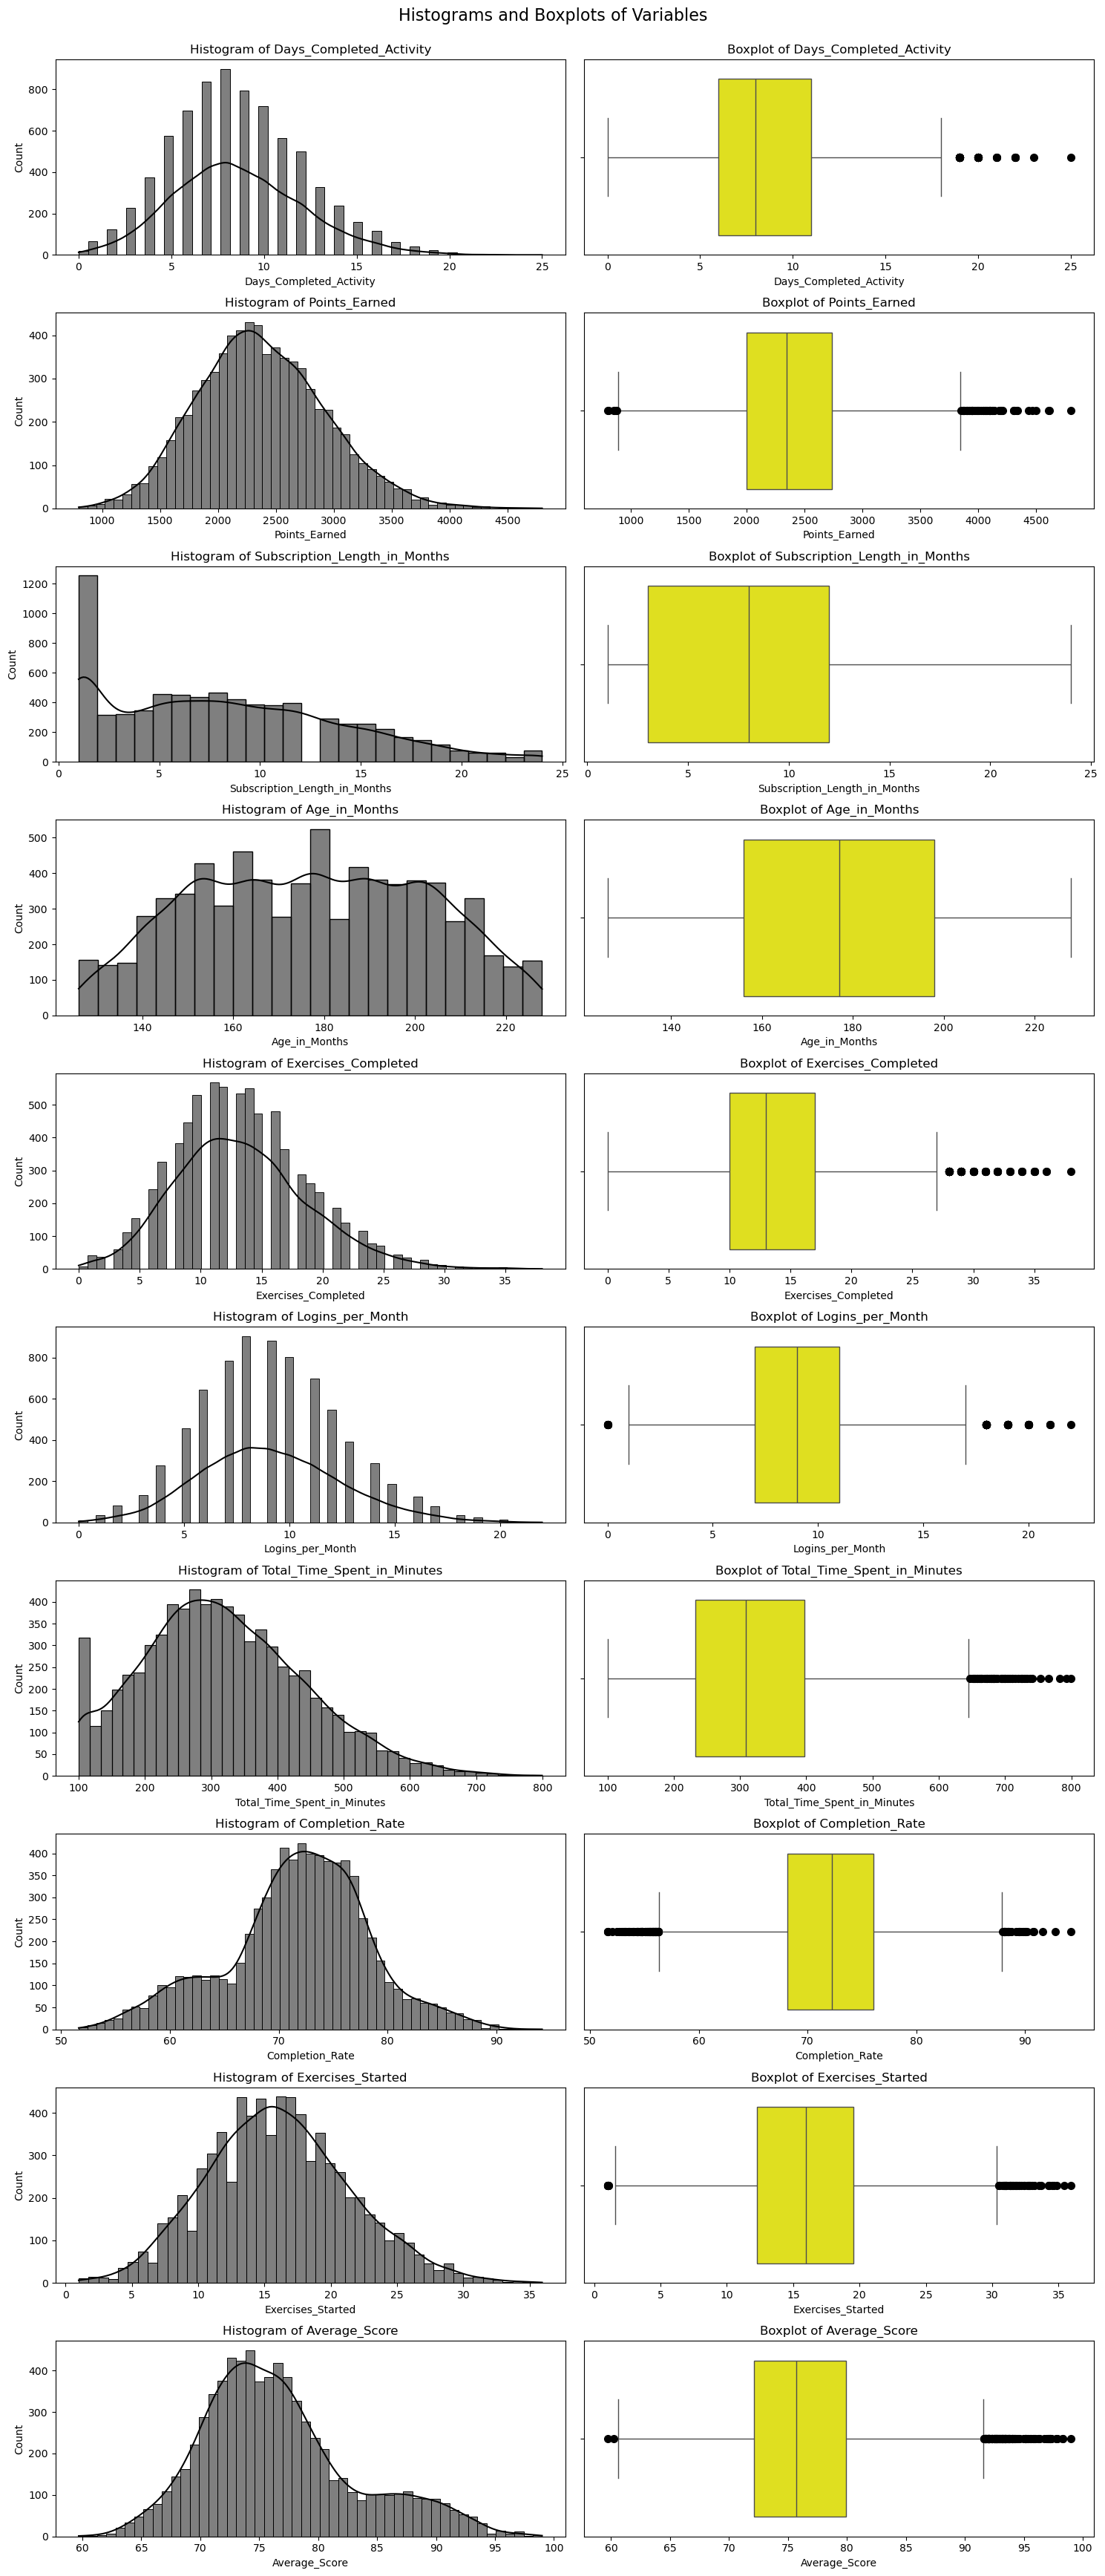

In [50]:

# Create a grid for the plots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 35))  # Adjusted for 10 pairs
fig.suptitle("Histograms and Boxplots of Variables", fontsize=16, y=0.99)

# Iterate over columns in X
for i, column in enumerate(X.columns):
    # Histogram on the left
    sns.histplot(X[column], ax=axes[i, 0], kde=True, color='black')
    axes[i, 0].set_title(f'Histogram of {column}', fontsize=12)

    # Boxplot on the right
    # Customizing the boxplot to show outliers as large black dots
    sns.boxplot(data=X, x=column, ax=axes[i, 1], color='yellow', fliersize=7, flierprops={'marker':'o', 'markerfacecolor':'black', 'markeredgecolor':'black'})

    axes[i, 1].set_title(f'Boxplot of {column}', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust the top margin to allow for the main title
plt.show()


# **Heatmap**

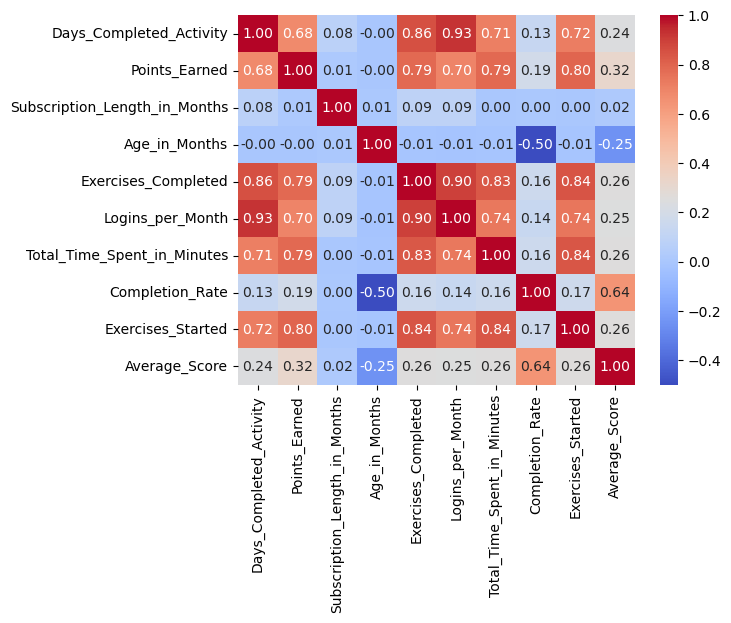

<Figure size 1000x800 with 0 Axes>

In [52]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 8))
plt.show()

In [53]:
cat = df.drop(['Days_Completed_Activity','Points_Earned','Subscription_Length_in_Months','Age_in_Months','Exercises_Completed',
                 'Logins_per_Month','Total_Time_Spent_in_Minutes','Completion_Rate','Exercises_Started','Average_Score'],axis = 1)


In [54]:
X_norm = X[['Subscription_Length_in_Months','Age_in_Months']]
X_norm

,Subscription_Length_in_Months,Age_in_Months
2,13,173
3,11,199
4,12,148
7,13,161
8,9,184
...,...,...
14833,2,223
14834,17,182
14839,7,127
14841,5,182


# **Removing Outliers**

In [56]:

X1 = X.drop(['Subscription_Length_in_Months','Age_in_Months','Total_Time_Spent_in_Minutes','Completion_Rate',
            'Exercises_Started','Average_Score','Points_Earned'],axis = 1)
# Assuming X is your DataFrame
# Calculate the absolute Z-scores for all columns
z_scores = np.abs(zscore(X1))

# Define a threshold for outliers
threshold = 2.5  # Common choice is 3, but adjust as needed

# Filter out rows where any column's Z-score is greater than the threshold
X_norma = X1[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {X1.shape[0]}")
print(f"Number of rows after removing outliers: {X_norma.shape[0]}")

# Display the DataFrame without outliers
X_norma

Original number of rows: 7396
Number of rows after removing outliers: 7201


,Days_Completed_Activity,Exercises_Completed,Logins_per_Month
2,4,10,7
4,8,17,10
7,6,10,7
8,9,13,8
10,3,7,5
...,...,...,...
14833,5,9,7
14834,11,22,12
14839,7,12,7
14841,9,13,7


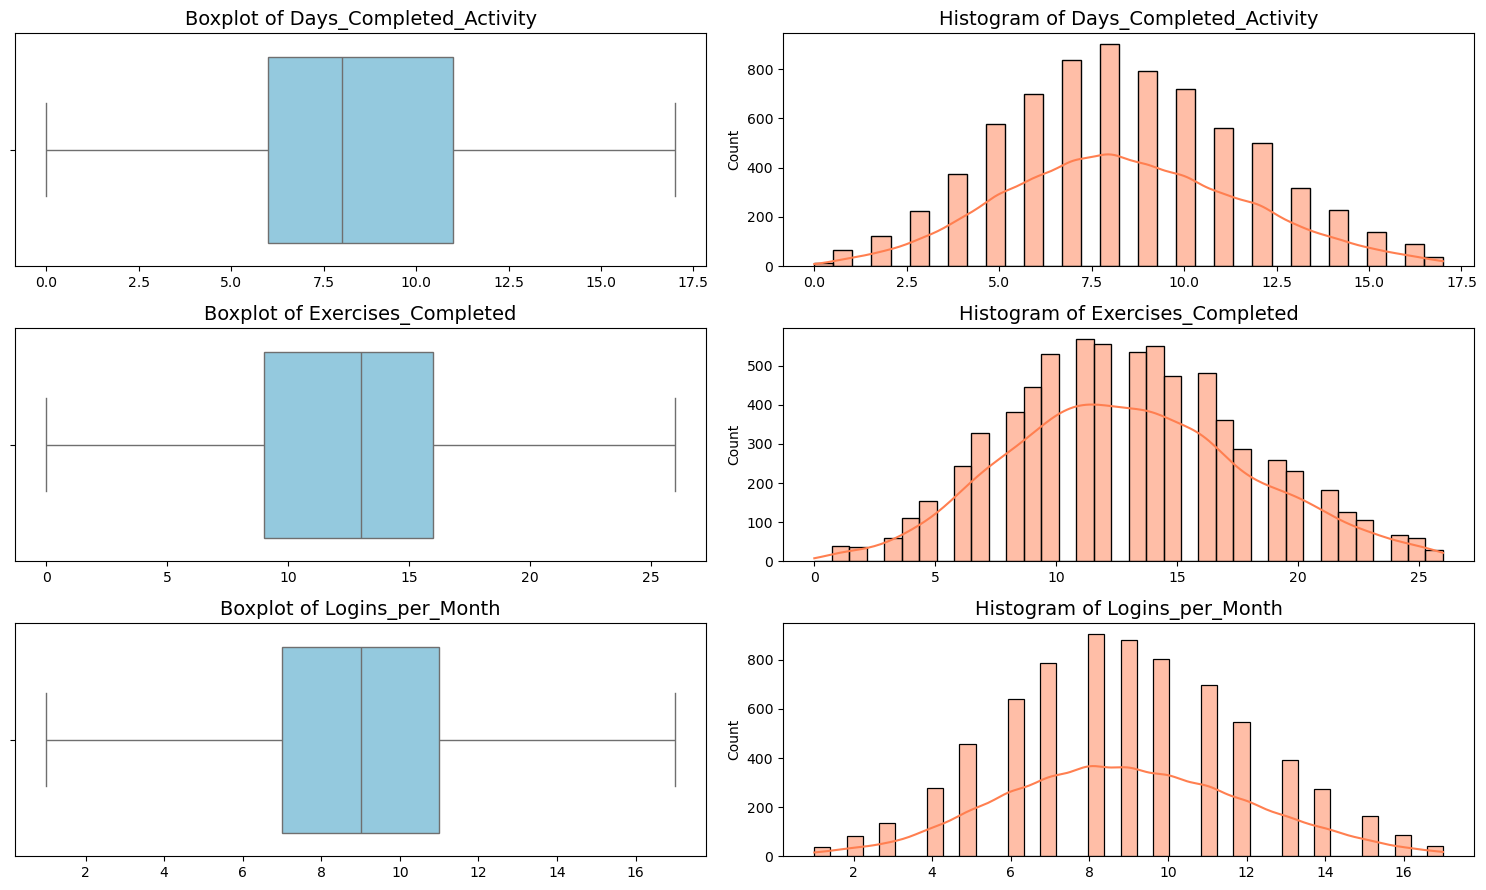

In [57]:

# Set up the subplots: 2 rows and 4 columns (2 for boxplots, 2 for histograms)
fig, axes = plt.subplots(nrows=len(X_norma.columns), ncols=2, figsize=(15, len(X_norma.columns) * 3))

# Iterate through each column in the dataset
for i, col in enumerate(X_norma.columns):
    # Boxplot on the left (column 0 of axes)
    sns.boxplot(data=X_norma, x=col, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i, 0].set_xlabel('')
    
    # Histogram on the right (column 1 of axes)
    sns.histplot(data=X_norma, x=col, kde=True, ax=axes[i, 1], color="coral")
    axes[i, 1].set_title(f'Histogram of {col}', fontsize=14)
    axes[i, 1].set_xlabel('')
    
# Adjust the layout
plt.tight_layout()
plt.show()

In [58]:

X2 = X[['Total_Time_Spent_in_Minutes','Points_Earned','Exercises_Started']]
# Assuming X is your DataFrame
# Calculate the absolute Z-scores for all columns
z_scores = np.abs(zscore(X2))

# Define a threshold for outliers
threshold = 2.5  # Common choice is 3, but adjust as needed

# Filter out rows where any column's Z-score is greater than the threshold
X_normb = X2[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {X2.shape[0]}")
print(f"Number of rows after removing outliers: {X_normb.shape[0]}")

# Display the DataFrame without outliers
X_normb

Original number of rows: 7396
Number of rows after removing outliers: 7187


,Total_Time_Spent_in_Minutes,Points_Earned,Exercises_Started
2,232.639784,1860.295769,12.159345
4,305.275706,2499.211664,15.458939
7,331.125489,2529.271431,12.091814
8,347.169701,2319.741881,18.024626
10,162.221141,1530.546814,10.000000
...,...,...,...
14833,262.008031,2384.977524,12.000000
14834,331.280997,2412.504817,18.000000
14839,367.768263,2173.623984,20.724994
14841,409.490339,2486.069547,20.679306


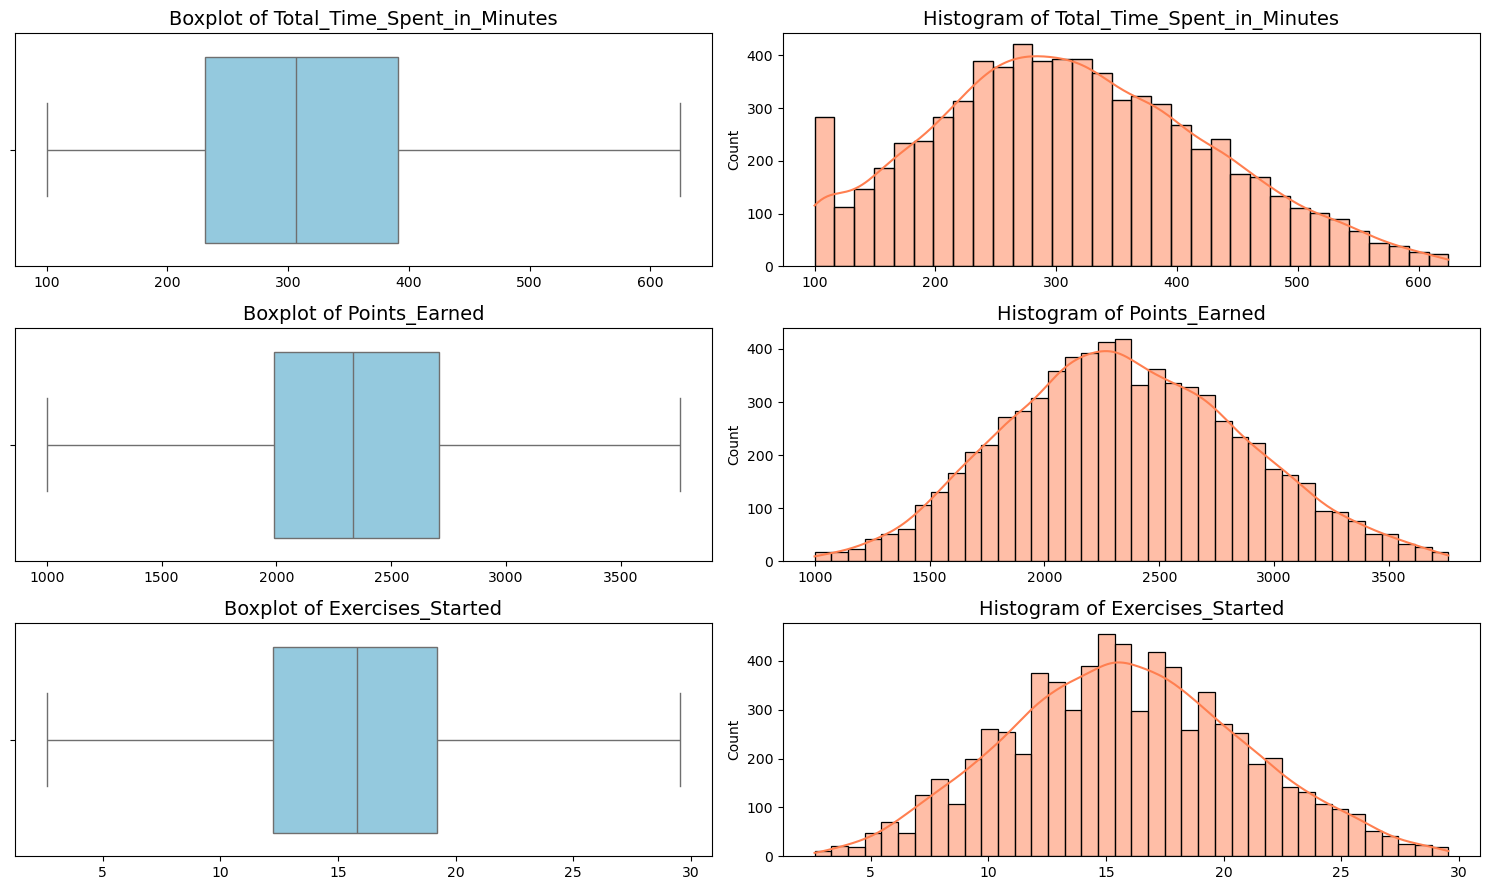

In [59]:

# Set up the subplots: 2 rows and 4 columns (2 for boxplots, 2 for histograms)
fig, axes = plt.subplots(nrows=len(X_normb.columns), ncols=2, figsize=(15, len(X_normb.columns) * 3))

# Iterate through each column in the dataset
for i, col in enumerate(X_normb.columns):
    # Boxplot on the left (column 0 of axes)
    sns.boxplot(data=X_normb, x=col, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i, 0].set_xlabel('')
    
    # Histogram on the right (column 1 of axes)
    sns.histplot(data=X_normb, x=col, kde=True, ax=axes[i, 1], color="coral")
    axes[i, 1].set_title(f'Histogram of {col}', fontsize=14)
    axes[i, 1].set_xlabel('')
    
# Adjust the layout
plt.tight_layout()
plt.show()


In [60]:

X3 = X[['Completion_Rate']]
# Assuming X is your DataFrame
# Calculate the absolute Z-scores for all columns
z_scores = np.abs(zscore(X3))

# Define a threshold for outliers
threshold = 2.0  # Common choice is 3, but adjust as needed

# Filter out rows where any column's Z-score is greater than the threshold
X_normc = X3[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {X3.shape[0]}")
print(f"Number of rows after removing outliers: {X_normc.shape[0]}")

# Display the DataFrame without outliers
X_normc

Original number of rows: 7396
Number of rows after removing outliers: 6961


,Completion_Rate
2,73.335360
3,66.872122
4,72.236281
7,73.037686
8,70.736462
...,...
14831,79.770309
14833,62.711077
14834,69.994512
14841,69.772144


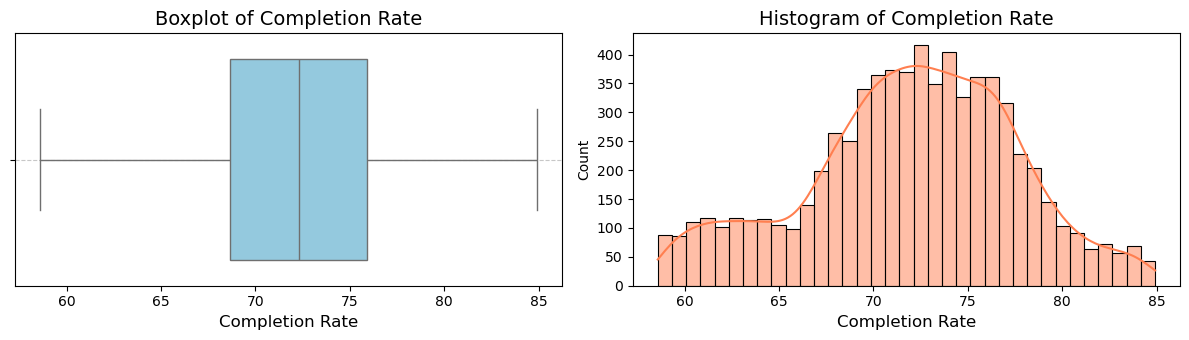

In [61]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 3.5))

# Boxplot on the left
sns.boxplot(data=X_normc, x='Completion_Rate', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Completion Rate', fontsize=14)
axes[0].set_xlabel('Completion Rate', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram on the right
sns.histplot(data=X_normc, x='Completion_Rate', kde=True, ax=axes[1], color='coral')
axes[1].set_title('Histogram of Completion Rate', fontsize=14)
axes[1].set_xlabel('Completion Rate', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [62]:
X4= X[['Average_Score']]
# Assuming X is your DataFrame
# Calculate the absolute Z-scores for all columns
z_scores = np.abs(zscore(X4))

# Define a threshold for outliers
threshold = 1.75  # Common choice is 3, but adjust as needed

# Filter out rows where any column's Z-score is greater than the threshold
X_normd = X4[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {X4.shape[0]}")
print(f"Number of rows after removing outliers: {X_normd.shape[0]}")

# Display the DataFrame without outliers
X_normd

Original number of rows: 7396
Number of rows after removing outliers: 6706


,Average_Score
2,72.861381
3,70.912510
4,79.714467
7,77.527424
8,81.405679
...,...
14833,69.602963
14834,77.348973
14839,85.374822
14841,73.076812


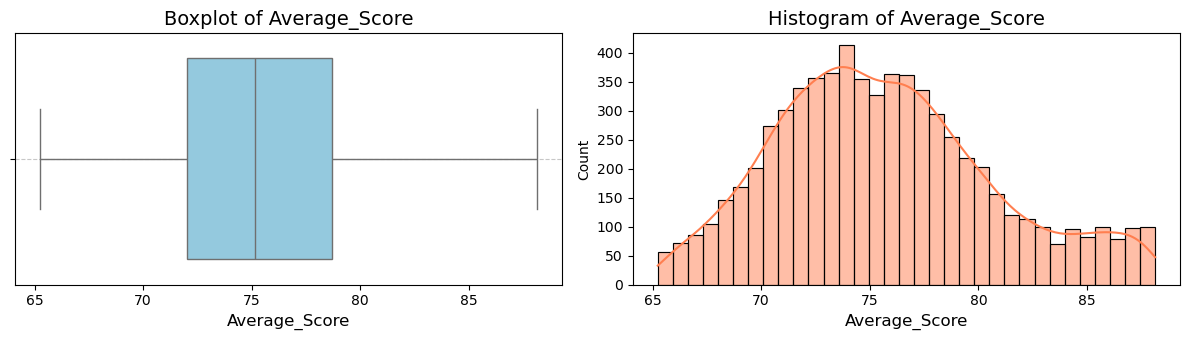

In [63]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 3.5))

# Boxplot on the left
sns.boxplot(data=X_normd, x='Average_Score', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Average_Score', fontsize=14)
axes[0].set_xlabel('Average_Score', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram on the right
sns.histplot(data=X_normd, x='Average_Score', kde=True, ax=axes[1], color='coral')
axes[1].set_title('Histogram of Average_Score', fontsize=14)
axes[1].set_xlabel('Average_Score', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [64]:
data = pd.concat([cat, X_norm, X_norma, X_normb, X_normc, X_normd], axis=1, join='outer')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 2 to 14842
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         7396 non-null   object 
 1   Grade                          7396 non-null   object 
 2   Course_Category                7396 non-null   object 
 3   Course_Rating                  7396 non-null   int64  
 4   Recommendation_Likelihood      7396 non-null   int64  
 5   Subscription_Tier              7396 non-null   object 
 6   Renewal_Status                 7396 non-null   object 
 7   Tutoring                       7396 non-null   object 
 8   Referrals                      7396 non-null   int64  
 9   Academic_Grade                 7396 non-null   object 
 10  Subscription_Length_in_Months  7396 non-null   int64  
 11  Age_in_Months                  7396 non-null   int64  
 12  Days_Completed_Activity        7201 non-null   float

# **Missing Values**

In [67]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Gender                           0.000000
Grade                            0.000000
Course_Category                  0.000000
Course_Rating                    0.000000
Recommendation_Likelihood        0.000000
Subscription_Tier                0.000000
Renewal_Status                   0.000000
Tutoring                         0.000000
Referrals                        0.000000
Academic_Grade                   0.000000
Subscription_Length_in_Months    0.000000
Age_in_Months                    0.000000
Days_Completed_Activity          2.636560
Exercises_Completed              2.636560
Logins_per_Month                 2.636560
Total_Time_Spent_in_Minutes      2.825852
Points_Earned                    2.825852
Exercises_Started                2.825852
Completion_Rate                  5.881558
Average_Score                    9.329367
dtype: float64


# **Removing Missing Values**

In [69]:
impdata = data.dropna()
impdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 2 to 14842
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         6131 non-null   object 
 1   Grade                          6131 non-null   object 
 2   Course_Category                6131 non-null   object 
 3   Course_Rating                  6131 non-null   int64  
 4   Recommendation_Likelihood      6131 non-null   int64  
 5   Subscription_Tier              6131 non-null   object 
 6   Renewal_Status                 6131 non-null   object 
 7   Tutoring                       6131 non-null   object 
 8   Referrals                      6131 non-null   int64  
 9   Academic_Grade                 6131 non-null   object 
 10  Subscription_Length_in_Months  6131 non-null   int64  
 11  Age_in_Months                  6131 non-null   int64  
 12  Days_Completed_Activity        6131 non-null   float

# **BoxCox Transformation on Total Time Spent in Minutes column**

C:\Users\durga\AppData\Local\Temp\ipykernel_23088\477230468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdata['SLM_BoxCox_Length'], fitted_lambda = boxcox(impdata['Subscription_Length_in_Months'])


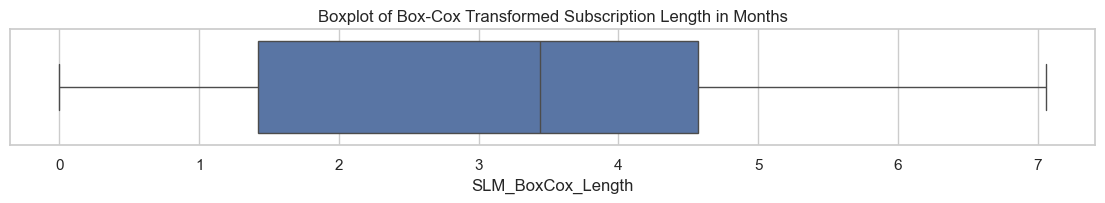

Lambda used for transformation: 0.4494172476416999


In [71]:

# Check if there are zero or negative values in the column as Box-Cox requires all positive values
if any(impdata['Subscription_Length_in_Months'] <= 0):
    # Shift the data if there are non-positive values
    impdata['Subscription_Length_in_Months'] += (1 - impdata['Subscription_Length_in_Months'].min())

# Applying the Box-Cox transformation
impdata['SLM_BoxCox_Length'], fitted_lambda = boxcox(impdata['Subscription_Length_in_Months'])

# Plotting the boxplot of the transformed data
sns.set(style="whitegrid")
plt.figure(figsize=(14, 1.5))
sns.boxplot(data=impdata, x='SLM_BoxCox_Length')
plt.title('Boxplot of Box-Cox Transformed Subscription Length in Months')
plt.show()

# Optionally, print the lambda used for transformation
print(f"Lambda used for transformation: {fitted_lambda}")


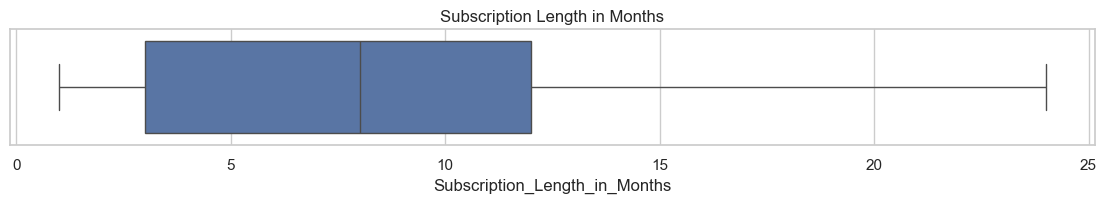

In [72]:
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(14, 1.5))
sns.boxplot(x=impdata['Subscription_Length_in_Months'])
plt.title('Subscription Length in Months')
plt.show()

# **BoxCox Transformation on Total Time Spent in Minutes column**

C:\Users\durga\AppData\Local\Temp\ipykernel_23088\1988961298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdata['TTSM_BoxCox_Length'], fitted_lambda = boxcox(impdata['Total_Time_Spent_in_Minutes'])


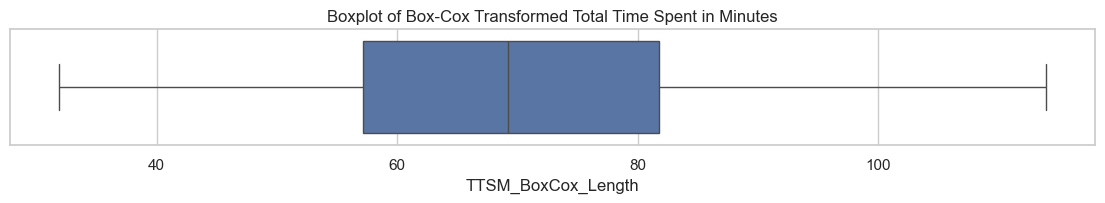

Lambda used for transformation: 0.6771707704579073


In [74]:

# Ensure there are no zero or negative values in the column, as Box-Cox requires positive values
if any(impdata['Total_Time_Spent_in_Minutes'] <= 0):
    # Shift the data if there are non-positive values
    impdata['Total_Time_Spent_in_Minutes'] += (1 - impdata['Total_Time_Spent_in_Minutes'].min())

# Applying the Box-Cox transformation
impdata['TTSM_BoxCox_Length'], fitted_lambda = boxcox(impdata['Total_Time_Spent_in_Minutes'])

# Plotting the boxplot of the transformed data
plt.figure(figsize=(14, 1.5))
sns.boxplot(data=impdata, x='TTSM_BoxCox_Length')
plt.title('Boxplot of Box-Cox Transformed Total Time Spent in Minutes')
plt.show()

# Optionally, print the lambda used for transformation
print(f"Lambda used for transformation: {fitted_lambda}")


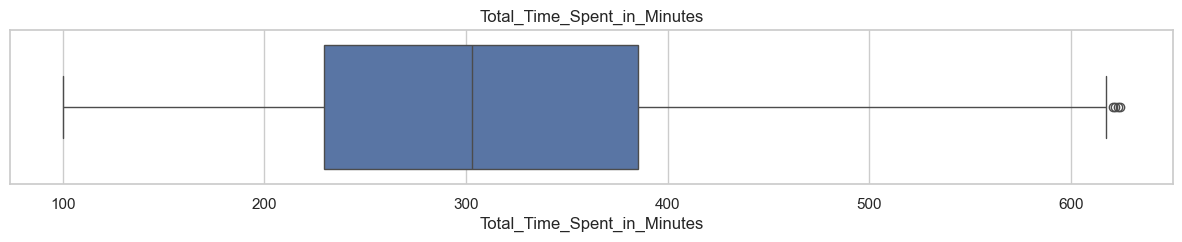

In [75]:
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(15, 2))
sns.boxplot(x=impdata['Total_Time_Spent_in_Minutes'])
plt.title('Total_Time_Spent_in_Minutes')
plt.show()

In [76]:
impdata = impdata.drop(['Subscription_Length_in_Months','Total_Time_Spent_in_Minutes'],axis = 1)

In [77]:
impdata.describe()

,Course_Rating,Recommendation_Likelihood,Referrals,Age_in_Months,Days_Completed_Activity,Exercises_Completed,Logins_per_Month,Points_Earned,Exercises_Started,Completion_Rate,Average_Score,SLM_BoxCox_Length,TTSM_BoxCox_Length
count,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000,6131.000000
mean,4.060512,3.568912,0.411352,176.155766,8.372044,12.914859,8.875061,2330.889850,15.681236,71.491779,75.646854,3.116684,69.129162
std,0.362732,0.623315,0.702892,25.212669,3.183726,4.805916,3.038156,497.856676,4.894181,5.263872,4.890449,1.991969,17.732166
min,3.000000,2.000000,0.000000,126.000000,0.000000,1.000000,1.000000,999.330863,2.621327,58.580811,65.301672,0.000000,31.915337
25%,4.000000,3.000000,0.000000,155.000000,6.000000,9.000000,7.000000,1983.114908,12.142394,68.428893,72.145794,1.420561,57.176269
50%,4.000000,4.000000,0.000000,176.000000,8.000000,13.000000,9.000000,2311.925441,15.659059,71.967339,75.168220,3.440086,69.224901
75%,4.000000,4.000000,1.000000,197.000000,11.000000,16.000000,11.000000,2672.090920,19.002143,75.317568,78.566194,4.572454,81.777956
max,5.000000,5.000000,3.000000,228.000000,17.000000,26.000000,17.000000,3754.930644,29.447745,84.913992,88.140005,7.056884,113.917797


# **Data Segmentation using K-Means**

In [79]:
clu_data = impdata.copy()

In [80]:
data = impdata.drop(['Grade','Gender','Academic_Grade','Renewal_Status','Subscription_Tier','Course_Rating'],axis = 1)

# One Hot Encoding

In [82]:
ohe = pd.get_dummies(data, columns=['Course_Category','Tutoring'],  dtype=bool)
ohe = ohe.astype(int)

In [83]:
data = ohe.rename(columns={
    'Course_Category_Math': 'Math',
    'Course_Category_Programming': 'Programming',
    'Course_Category_Science': 'Science'
})

In [84]:
b = data[['Math','Programming','Science','Tutoring_No','Tutoring_Yes']].reset_index(drop=True)
b

,Math,Programming,Science,Tutoring_No,Tutoring_Yes
0,1,0,0,1,0
1,0,1,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0
...,...,...,...,...,...
6126,1,0,0,0,1
6127,0,1,0,1,0
6128,1,0,0,1,0
6129,1,0,0,1,0


# Standardizing

In [86]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = pd.DataFrame(scale.fit_transform(data),columns = data.columns)
data

,Recommendation_Likelihood,Referrals,Age_in_Months,Days_Completed_Activity,Exercises_Completed,Logins_per_Month,Points_Earned,Exercises_Started,Completion_Rate,Average_Score,SLM_BoxCox_Length,TTSM_BoxCox_Length,Math,Programming,Science,Tutoring_No,Tutoring_Yes
0,0.691662,-0.585276,-0.125176,-1.373359,-0.606564,-0.617221,-0.944909,-0.681010,0.379091,-0.641949,0.670077,-0.654554,1.423432,-0.716817,-0.702009,0.394315,-0.394315
1,0.691662,-0.585276,-1.116822,-0.116867,0.850093,0.370300,0.338697,-0.062268,0.189484,0.787391,0.670077,0.021265,-0.702527,1.395055,-0.702009,0.394315,-0.394315
2,0.691662,0.837534,-0.601166,-0.745113,-0.606564,-0.617221,0.398960,-0.681010,0.379091,0.379008,0.670077,0.246538,1.423432,-0.716817,-0.702009,0.394315,-0.394315
3,-0.912795,2.260344,0.311148,0.197256,0.017717,-0.288047,-0.022882,0.556474,-0.189731,1.195773,0.149717,0.415493,1.423432,-0.716817,-0.702009,0.394315,-0.394315
4,0.691662,0.837534,0.390480,-1.687482,-1.230846,-1.275569,-1.607804,-1.093504,-0.000124,-0.846140,-0.891003,-1.386690,1.423432,-0.716817,-0.702009,0.394315,-0.394315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,2.296119,-0.585276,-1.156488,0.197256,0.641999,0.370300,0.738443,0.762721,1.516735,2.012539,-1.411363,0.584447,1.423432,-0.716817,-0.702009,-2.536043,2.536043
6127,0.691662,2.260344,1.858116,-1.059236,-0.814658,-0.617221,0.107688,-0.681010,-1.706590,-1.254523,-1.411363,-0.372962,-0.702527,1.395055,-0.702009,0.394315,-0.394315
6128,-0.912795,2.260344,0.231816,0.825501,1.890562,1.028648,0.163934,0.556474,-0.379338,0.379008,1.190437,0.246538,1.423432,-0.716817,-0.702009,0.394315,-0.394315
6129,0.691662,-0.585276,0.231816,0.197256,0.017717,-0.617221,0.312583,0.968969,-0.379338,-0.437758,-0.370643,0.922357,1.423432,-0.716817,-0.702009,0.394315,-0.394315


In [87]:
# Average variance across all features

variances = data.var()

average_variance = variances.mean()
print("Average Variance:", average_variance)


Average Variance: 1.0001631321370146


# Principal Component Analysis

In [89]:
from sklearn.decomposition import PCA
# Defining the Principal Components, such that data will be reduced to two␣
pca = PCA(n_components=2)
 # Transforming the data into 2 dimensional space
res_pca = pca.fit_transform(data)

# Elbow Plot

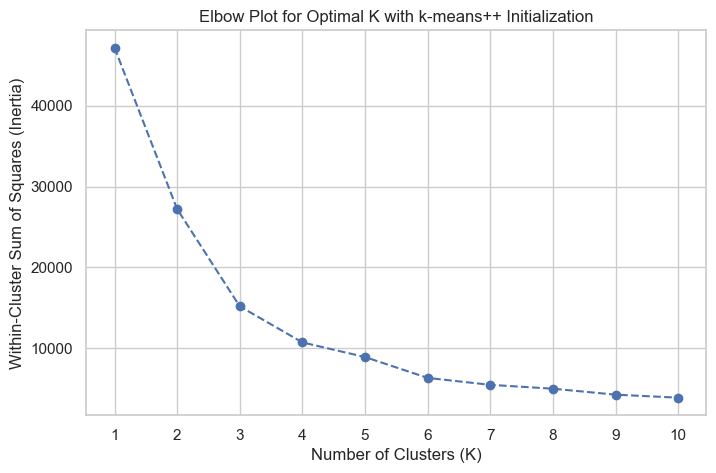

In [91]:
from sklearn.cluster import KMeans

# List to store the sum of squared distances for different K values
inertia = []

# Range of K values to testa
K_range = range(1, 11)

# Calculate the inertia for each K using k-means++ initialization
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(res_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(range(1,11,1))
plt.title('Elbow Plot for Optimal K with k-means++ Initialization')
plt.show()

# Linear Kernel PCA

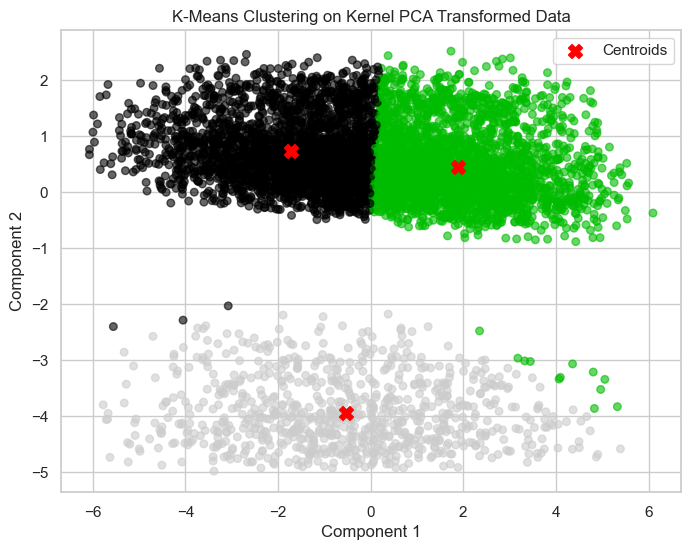

Silhouette Score: 0.4902856202918785


In [93]:
# Create a DataFrame for the PCA results

pca_df = pd.DataFrame(res_pca, columns=['PCA1', 'PCA2'])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Corrected 'init' parameter
kmeans.fit(res_pca)
labels = kmeans.labels_

# Visualizing the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(res_pca[:, 0], res_pca[:, 1], c=labels, cmap='nipy_spectral', s=30, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering on Kernel PCA Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(res_pca, labels)
print(f'Silhouette Score: {sil_score}')

# Polynomial Kernel PCA

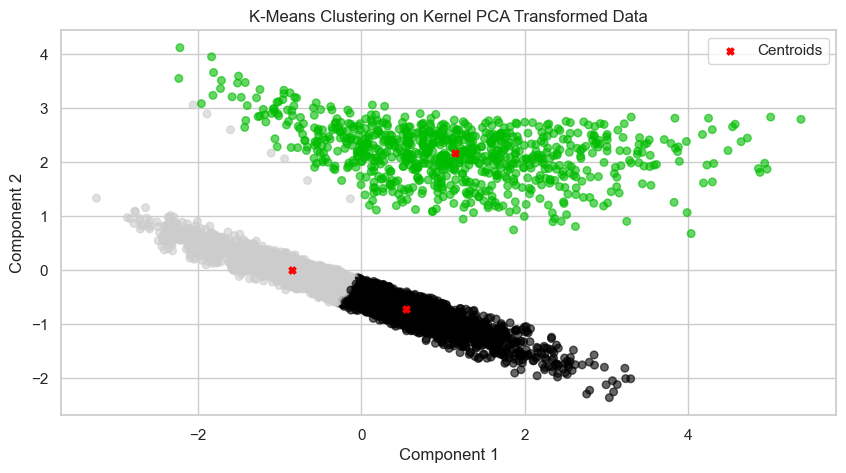

Silhouette Score: 0.4981284717606965


In [95]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
res_kpca_poly = kpca.fit_transform(data)

poly_df = pd.DataFrame(res_kpca_poly, columns=['PCA1', 'PCA2'])

# Performing K-Means clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Corrected 'init' parameter
kmeans.fit(res_kpca_poly)
poly_labels = kmeans.labels_

# Visualizing the clustering results
plt.figure(figsize=(10, 5))
plt.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], c=poly_labels, cmap='nipy_spectral', s=30, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=25, label='Centroids')
plt.title('K-Means Clustering on Kernel PCA Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the silhouette score
sil_score = silhouette_score(res_kpca_poly, poly_labels)
print(f'Silhouette Score: {sil_score}')

# Radial Basis Function Kernel PCA

In [97]:
# Average variance across all features

variances = data.var()

average_variance = variances.mean()
print("Average Variance:", average_variance)

gamma = 1/average_variance
print("gamma : ",gamma)

Average Variance: 1.0001631321370146
gamma :  0.999836894470739


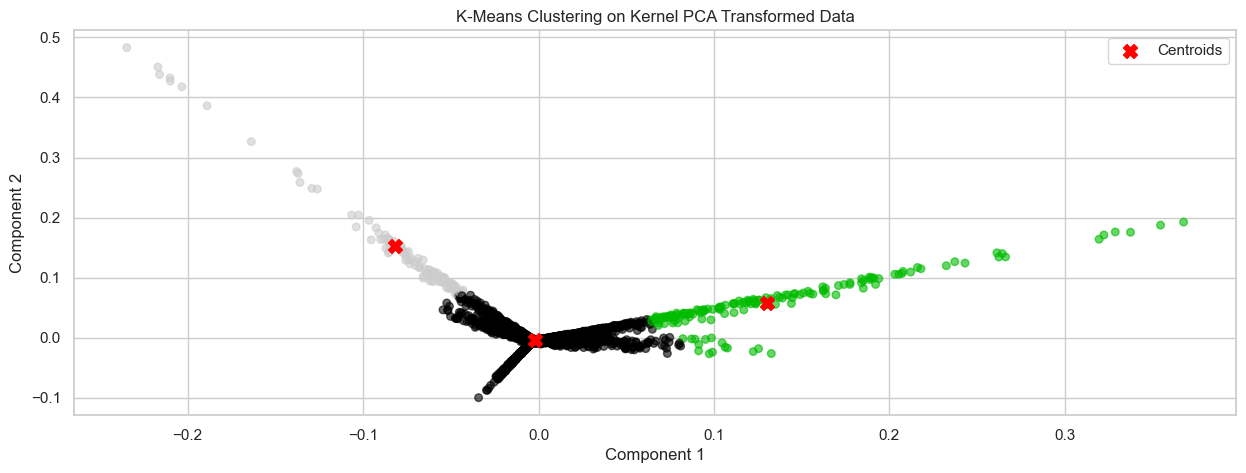

Silhouette Score: 0.8711706934810395


In [98]:
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
res_kpca_rbf = kpca.fit_transform(data)

rbf_df = pd.DataFrame(res_kpca_rbf, columns=['PCA1', 'PCA2'])
# Create a DataFrame for the PCA results

# Performing K-Means clustering with KMeans++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Corrected 'init' parameter
kmeans.fit(res_kpca_rbf)
rbf_labels = kmeans.labels_

# Visualizing the clustering results
plt.figure(figsize=(15, 5))
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], c=rbf_labels, cmap='nipy_spectral', s=30, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering on Kernel PCA Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(res_kpca_rbf, rbf_labels)
print(f'Silhouette Score: {sil_score}')

# Sigmoid Kernel PCA

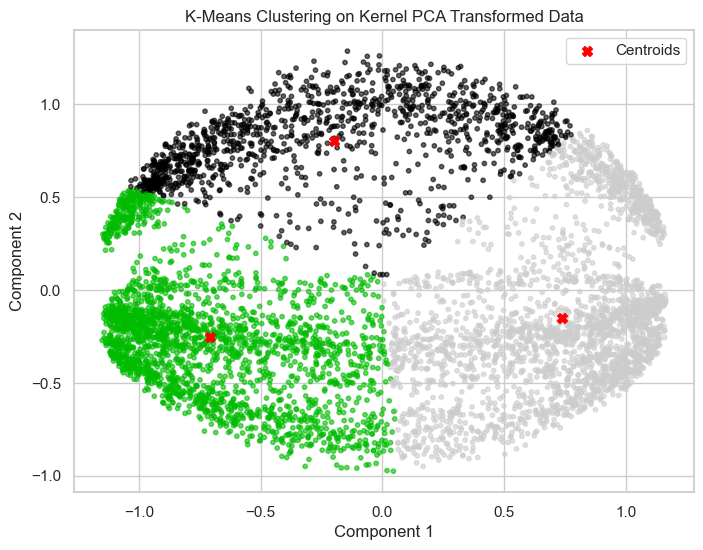

Silhouette Score: 0.4805856821862382


In [100]:
# Specifying the dimensionality and kernel function for Kernel PCA with sigmoid kernel
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=1, coef0=0)

# Transforming the data into a lower dimensional space
res_kpca_sig = kpca.fit_transform(data)
sig_df = pd.DataFrame(res_kpca_sig, columns=['PCA1', 'PCA2'])
# Create a DataFrame for the PCA results

kmeans = KMeans(n_clusters=3, random_state=42)  # Corrected 'init' parameter
kmeans.fit(res_kpca_sig)
sig_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(res_kpca_sig[:, 0], res_kpca_sig[:, 1], c=sig_labels, cmap='nipy_spectral', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=50, label='Centroids')
plt.title('K-Means Clustering on Kernel PCA Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

sil_score = silhouette_score(res_kpca_sig, sig_labels)
print(f'Silhouette Score: {sil_score}')

# Cluster Assignment

In [102]:
clu_data = clu_data.reset_index(drop=True)
clu_data['Cluster'] = rbf_labels  # Add cluster labels to the DataFrame

# Reorder columns to put 'Cluster' first
columns = ['Cluster'] + [col for col in clu_data.columns if col != 'Cluster']
clu_data = clu_data[columns]
clu_data


,Cluster,Gender,Grade,Course_Category,Course_Rating,Recommendation_Likelihood,Subscription_Tier,Renewal_Status,Tutoring,Referrals,...,Age_in_Months,Days_Completed_Activity,Exercises_Completed,Logins_per_Month,Points_Earned,Exercises_Started,Completion_Rate,Average_Score,SLM_BoxCox_Length,TTSM_BoxCox_Length
0,0,Other,9th Grade,Math,4,4,Premium,Yes,No,0,...,173,4.0,10.0,7.0,1860.295769,12.159345,73.335360,72.861381,4.821431,57.672759
1,2,Female,7th Grade,Programming,4,4,Premium,Yes,No,0,...,148,8.0,17.0,10.0,2499.211664,15.458939,72.236281,79.714467,4.572454,69.622147
2,0,Female,7th Grade,Math,4,4,Premium,Yes,No,1,...,161,6.0,10.0,7.0,2529.271431,12.091814,73.037686,77.527424,4.821431,73.645266
3,0,Male,9th Grade,Math,4,3,Basic,Yes,No,2,...,184,9.0,13.0,8.0,2319.741881,18.024626,70.736462,81.405679,3.748045,76.091243
4,0,Male,10th Grade,Math,4,4,Basic,Yes,No,1,...,186,3.0,7.0,5.0,1530.546814,10.000000,71.524383,71.402166,1.420561,44.859633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,Female,6th Grade,Math,5,5,Basic,Yes,Yes,0,...,147,9.0,16.0,10.0,2698.021889,19.341885,79.770309,85.884324,0.000000,79.335657
6127,0,Other,12th Grade,Programming,4,4,Basic,Yes,No,2,...,223,5.0,9.0,7.0,2384.977524,12.000000,62.711077,69.602963,0.813250,62.631494
6128,0,Other,10th Grade,Math,4,3,Premium,No,No,2,...,182,11.0,22.0,12.0,2412.504817,18.000000,69.994512,77.348973,5.724312,73.669155
6129,0,Male,10th Grade,Math,4,4,Basic,Yes,No,0,...,182,9.0,13.0,7.0,2486.069547,20.679306,69.772144,73.076812,2.361376,85.266749


# Cluster Distribution

In [104]:
f = clu_data['Cluster'].value_counts()
f = pd.DataFrame(f)
f

,count
Cluster,
0,5869
1,164
2,98


In [105]:
file_path = r'C:\Users\durga\OneDrive\Desktop\hanuman\clu_data.csv'
clu_data.to_csv(file_path, index=False)

# **Machine Learning Model Building**

In [107]:
impdata

,Gender,Grade,Course_Category,Course_Rating,Recommendation_Likelihood,Subscription_Tier,Renewal_Status,Tutoring,Referrals,Academic_Grade,Age_in_Months,Days_Completed_Activity,Exercises_Completed,Logins_per_Month,Points_Earned,Exercises_Started,Completion_Rate,Average_Score,SLM_BoxCox_Length,TTSM_BoxCox_Length
2,Other,9th Grade,Math,4,4,Premium,Yes,No,0,D,173,4.0,10.0,7.0,1860.295769,12.159345,73.335360,72.861381,4.821431,57.672759
4,Female,7th Grade,Programming,4,4,Premium,Yes,No,0,F,148,8.0,17.0,10.0,2499.211664,15.458939,72.236281,79.714467,4.572454,69.622147
7,Female,7th Grade,Math,4,4,Premium,Yes,No,1,F,161,6.0,10.0,7.0,2529.271431,12.091814,73.037686,77.527424,4.821431,73.645266
8,Male,9th Grade,Math,4,3,Basic,Yes,No,2,D,184,9.0,13.0,8.0,2319.741881,18.024626,70.736462,81.405679,3.748045,76.091243
10,Male,10th Grade,Math,4,4,Basic,Yes,No,1,F,186,3.0,7.0,5.0,1530.546814,10.000000,71.524383,71.402166,1.420561,44.859633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,Female,6th Grade,Math,5,5,Basic,Yes,Yes,0,D,147,9.0,16.0,10.0,2698.021889,19.341885,79.770309,85.884324,0.000000,79.335657
14833,Other,12th Grade,Programming,4,4,Basic,Yes,No,2,F,223,5.0,9.0,7.0,2384.977524,12.000000,62.711077,69.602963,0.813250,62.631494
14834,Other,10th Grade,Math,4,3,Premium,No,No,2,F,182,11.0,22.0,12.0,2412.504817,18.000000,69.994512,77.348973,5.724312,73.669155
14841,Male,10th Grade,Math,4,4,Basic,Yes,No,0,F,182,9.0,13.0,7.0,2486.069547,20.679306,69.772144,73.076812,2.361376,85.266749


In [108]:
a = impdata.drop(['Gender','Grade','Academic_Grade','Tutoring','Course_Rating',
                  'Subscription_Tier','Renewal_Status','Course_Category'],axis = 1)

In [109]:
a = pd.DataFrame(scale.fit_transform(a),columns = a.columns)
a

,Recommendation_Likelihood,Referrals,Age_in_Months,Days_Completed_Activity,Exercises_Completed,Logins_per_Month,Points_Earned,Exercises_Started,Completion_Rate,Average_Score,SLM_BoxCox_Length,TTSM_BoxCox_Length
0,0.691662,-0.585276,-0.125176,-1.373359,-0.606564,-0.617221,-0.945317,-0.719667,0.350261,-0.569620,0.855880,-0.646133
1,0.691662,-0.585276,-1.116822,-0.116867,0.850093,0.370300,0.338120,-0.045424,0.141448,0.831814,0.730880,0.027804
2,0.691662,0.837534,-0.601166,-0.745113,-0.606564,-0.617221,0.398504,-0.733466,0.293706,0.384571,0.855880,0.254705
3,-0.912795,2.260344,0.311148,0.197256,0.017717,-0.288047,-0.022394,0.478850,-0.143502,1.177662,0.316979,0.392656
4,0.691662,0.837534,0.390480,-1.687482,-1.230846,-1.275569,-1.607708,-1.160909,0.006194,-0.868025,-0.851550,-1.368784
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,2.296119,-0.585276,-1.156488,0.197256,0.641999,0.370300,0.737485,0.748020,1.572836,2.093531,-1.564752,0.575639
6127,0.691662,2.260344,1.858116,-1.059236,-0.814658,-0.617221,0.108650,-0.752227,-1.668243,-1.235957,-1.156454,-0.366464
6128,-0.912795,2.260344,0.231816,0.825501,1.890562,1.028648,0.163946,0.473818,-0.284465,0.348078,1.309178,0.256052
6129,0.691662,-0.585276,0.231816,0.197256,0.017717,-0.617221,0.311721,1.021310,-0.326713,-0.525566,-0.379207,0.910148


# Feature Set

In [111]:
X = a[['Days_Completed_Activity','Points_Earned','SLM_BoxCox_Length','Age_in_Months','Exercises_Completed',
        'Logins_per_Month','TTSM_BoxCox_Length','Exercises_Started','Referrals',
       'Recommendation_Likelihood']]
Xx = pd.concat([b,X],axis = 1)
Xx

,Math,Programming,Science,Tutoring_No,Tutoring_Yes,Days_Completed_Activity,Points_Earned,SLM_BoxCox_Length,Age_in_Months,Exercises_Completed,Logins_per_Month,TTSM_BoxCox_Length,Exercises_Started,Referrals,Recommendation_Likelihood
0,1,0,0,1,0,-1.373359,-0.945317,0.855880,-0.125176,-0.606564,-0.617221,-0.646133,-0.719667,-0.585276,0.691662
1,0,1,0,1,0,-0.116867,0.338120,0.730880,-1.116822,0.850093,0.370300,0.027804,-0.045424,-0.585276,0.691662
2,1,0,0,1,0,-0.745113,0.398504,0.855880,-0.601166,-0.606564,-0.617221,0.254705,-0.733466,0.837534,0.691662
3,1,0,0,1,0,0.197256,-0.022394,0.316979,0.311148,0.017717,-0.288047,0.392656,0.478850,2.260344,-0.912795
4,1,0,0,1,0,-1.687482,-1.607708,-0.851550,0.390480,-1.230846,-1.275569,-1.368784,-1.160909,0.837534,0.691662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,1,0,0,0,1,0.197256,0.737485,-1.564752,-1.156488,0.641999,0.370300,0.575639,0.748020,-0.585276,2.296119
6127,0,1,0,1,0,-1.059236,0.108650,-1.156454,1.858116,-0.814658,-0.617221,-0.366464,-0.752227,2.260344,0.691662
6128,1,0,0,1,0,0.825501,0.163946,1.309178,0.231816,1.890562,1.028648,0.256052,0.473818,2.260344,-0.912795
6129,1,0,0,1,0,0.197256,0.311721,-0.379207,0.231816,0.017717,-0.617221,0.910148,1.021310,-0.585276,0.691662


# Label Encoding

In [113]:
# Encode target labels
y = impdata['Subscription_Tier']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 0, 1])

# Splitting the data into Training and Testing data

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xx,y,test_size = 0.20,random_state = 42)

# *K Nearest Neighbours (KNN) with Synthetic Minority Over Sampling Technique (SMOTE)*

In [117]:
from sklearn.neighbors import KNeighborsClassifier

# Prepare data with SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# KNN model setup with parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}

# Using KNN through GridSearchCV
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model from the grid search
best_model_knn = grid_search_knn.best_estimator_

# Train the final model with the best parameters on the resampled training data
final_model_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
final_model_knn.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_knn = final_model_knn.predict(X_test)
y_prob_knn = final_model_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Output the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Calculate and print the ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print("ROC-AUC Score:", roc_auc_knn)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)

# Calculate AUPRC
auprc_knn = auc(recall_knn, precision_knn)
print("AUPRC:", auprc_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       763
           1       0.57      0.61      0.58       464

    accuracy                           0.67      1227
   macro avg       0.66      0.66      0.66      1227
weighted avg       0.68      0.67      0.68      1227

Confusion Matrix:
[[547 216]
 [183 281]]
ROC-AUC Score: 0.7121489017941881
AUPRC: 0.5942831545158818


# *Decision Trees with SMOTE*

In [119]:
from sklearn.tree import DecisionTreeClassifier

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Decision Tree model with GridSearchCV for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model
best_model_dt = grid_search_dt.best_estimator_

# Train final model with best parameters on the resampled train set
final_model_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
final_model_dt.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on the test set
y_pred_dt = final_model_dt.predict(X_test)
y_prob_dt = final_model_dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC Score:", roc_auc)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)

# Calculate AUPRC
auprc_dt = auc(recall_dt, precision_dt)
print("AUPRC:", auprc_dt)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       763
           1       0.67      0.58      0.62       464

    accuracy                           0.73      1227
   macro avg       0.71      0.70      0.70      1227
weighted avg       0.73      0.73      0.73      1227

Confusion Matrix:
[[629 134]
 [197 267]]
ROC-AUC Score: 0.7581419193745198
AUPRC: 0.6775256539243272


# *Random Forest with SMOTE*

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model and setup GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Train the final model with the best parameters from grid search, but now using the resampled dataset
final_model_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
final_model_rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_rf = final_model_rf.predict(X_test)
y_prob_rf = final_model_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Output the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# Calculate AUPRC
auprc_rf = auc(recall_rf, precision_rf)
print("AUPRC:", auprc_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       763
           1       0.67      0.62      0.64       464

    accuracy                           0.74      1227
   macro avg       0.72      0.72      0.72      1227
weighted avg       0.74      0.74      0.74      1227

Confusion Matrix:
[[623 140]
 [178 286]]
ROC-AUC Score: 0.7922023997830705
AUPRC: 0.7054122298370105


# *XG Boost with SMOTE*

In [123]:
import xgboost as xgb

# Handle class imbalance in the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameters for XGBoost and train with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

model_xgb = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model from GridSearch
best_model_xgb = grid_search_xgb.best_estimator_

# Train the final model with the best hyperparameters on the resampled training data
final_model_xgb = xgb.XGBClassifier(**grid_search_xgb.best_params_,
                                    objective='binary:logistic',
                                    use_label_encoder=False,
                                    eval_metric='logloss')
final_model_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_xgb = final_model_xgb.predict(X_test)
y_prob_xgb = final_model_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_xgb)
print("ROC-AUC Score:", roc_auc)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

# Calculate AUPRC
auprc_xgb = auc(recall_xgb, precision_xgb)
print("AUPRC:", auprc_xgb)

C:\Users\durga\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\durga\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       763
           1       0.67      0.62      0.65       464

    accuracy                           0.74      1227
   macro avg       0.73      0.72      0.72      1227
weighted avg       0.74      0.74      0.74      1227

Confusion Matrix:
[[621 142]
 [174 290]]
ROC-AUC Score: 0.8022127943236769
AUPRC: 0.7525459952336333


# Model Evaluation Table

In [125]:
# Placeholder for true predictions
y_true = y_test

# Collect predictions from all models
predictions = {
    'KNN': (y_pred_knn, y_prob_knn),
    'Decision Tree': (y_pred_dt, y_prob_dt),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'XGBoost': (y_pred_xgb, y_prob_xgb),
}

# Calculate accuracy and ROC-AUC for each model, along with other metrics
results = []
for model_name, (preds, probs) in predictions.items():
    if probs.ndim > 1:
        roc_auc = roc_auc_score(y_true, probs[:, 1])  # For multiclass or binary classification with probability of each class
        auprc = average_precision_score(y_true, probs[:, 1])
    else:
        roc_auc = roc_auc_score(y_true, probs)  # For binary classification with one output
        auprc = average_precision_score(y_true, probs)
    precision = precision_score(y_true, preds, average='weighted')
    recall = recall_score(y_true, preds, average='weighted')
    accuracy = accuracy_score(y_true, preds)  # Calculating accuracy
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,  # Adding accuracy to the results
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'AUPRC': auprc,
        'ROC-AUC': roc_auc
    })

# Create DataFrame
results_df = pd.DataFrame(results).round(2)

# Display the DataFrame
sorted_df = results_df.sort_values(by='ROC-AUC', ascending=False)
sorted_df


,Model,Accuracy,Precision (Weighted),Recall (Weighted),AUPRC,ROC-AUC
3,XGBoost,0.74,0.74,0.74,0.75,0.80
2,Random Forest,0.74,0.74,0.74,0.71,0.79
1,Decision Tree,0.73,0.73,0.73,0.67,0.76
0,KNN,0.67,0.68,0.67,0.58,0.71


# **Feature Importance**

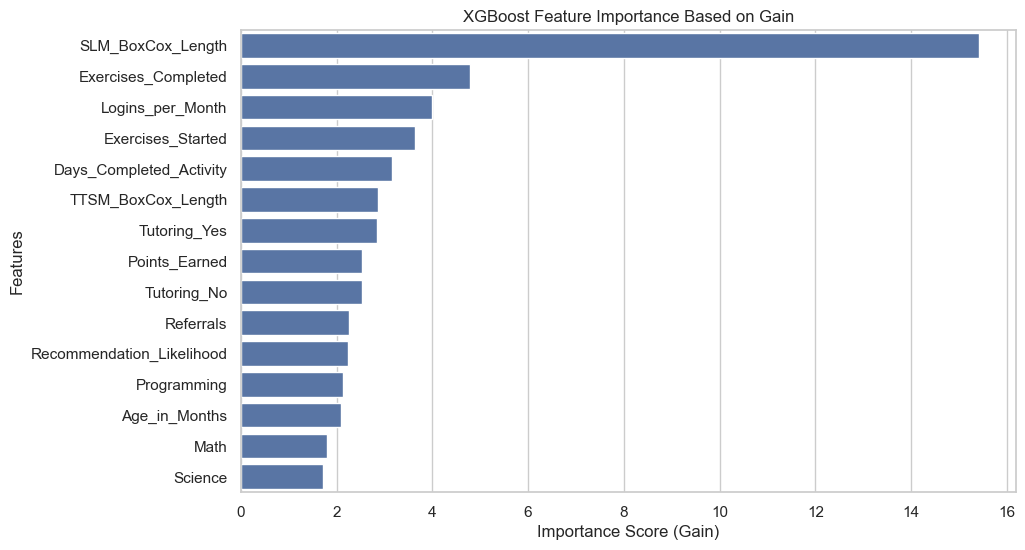

In [127]:

# Assuming final_model_xgb is your trained XGBoost model
booster = final_model_xgb.get_booster()
importance_gain = booster.get_score(importance_type='gain')

# Creating a DataFrame to hold feature names and their importance scores
# Note: get_score returns a dictionary where keys are feature names and values are scores
feature_importance_gain_df = pd.DataFrame(list(importance_gain.items()), columns=['Feature', 'Importance'])
feature_importance_gain_df = feature_importance_gain_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gain_df)
plt.title('XGBoost Feature Importance Based on Gain')
plt.xlabel('Importance Score (Gain)')
plt.ylabel('Features')
plt.show()
